In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSCanonical

In [2]:
data_path = "data/clean raw data.xlsx"
df = pd.read_excel(data_path)

In [3]:
X = df[df.columns[3:]]
Y = df["Brix"].values

In [4]:
from sklearn.model_selection import train_test_split

X_matrix = X.to_numpy()
nonzero_index = np.nonzero(X_matrix.sum(axis = 0))[0]
X_matrix_nonzero = X_matrix[:, nonzero_index]
X_nonzero_columns = X.columns[nonzero_index]

## Wavelength signal VS Brix Value

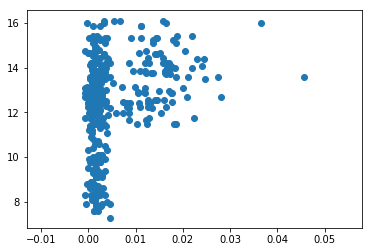

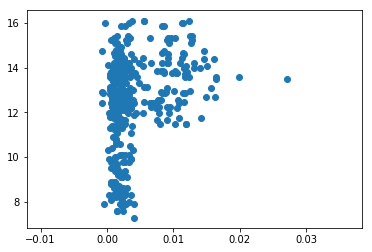

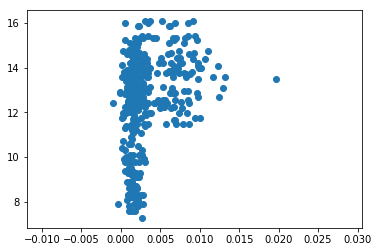

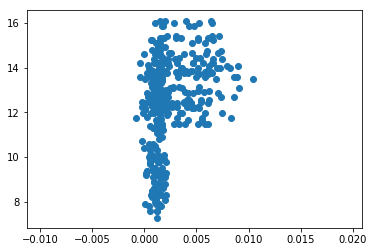

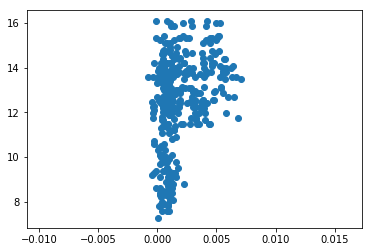

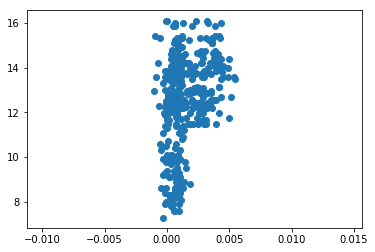

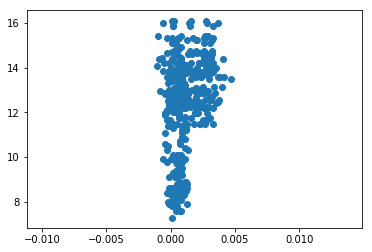

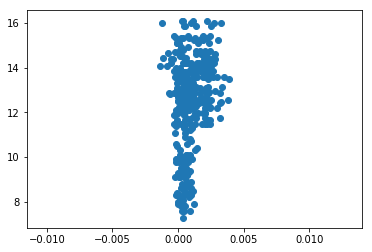

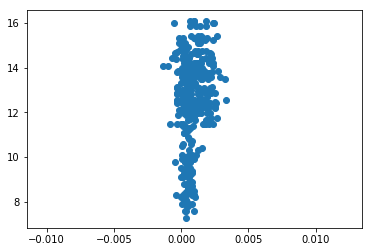

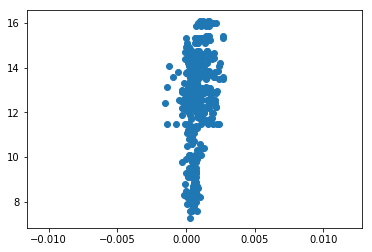

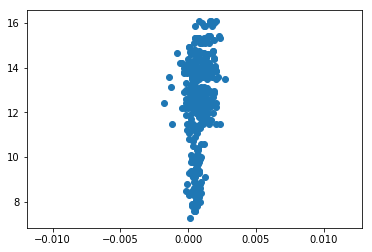

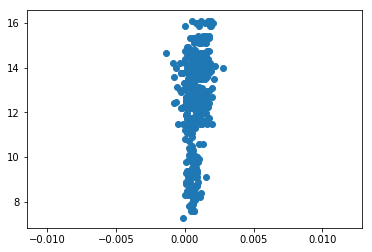

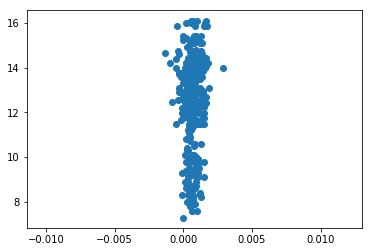

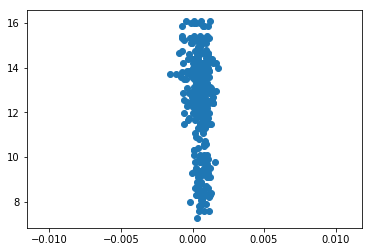

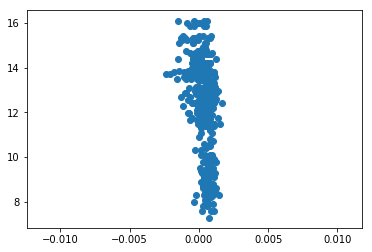

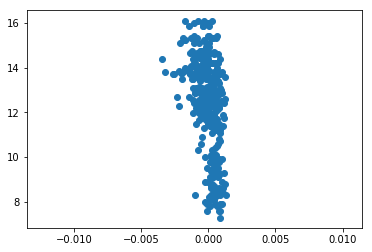

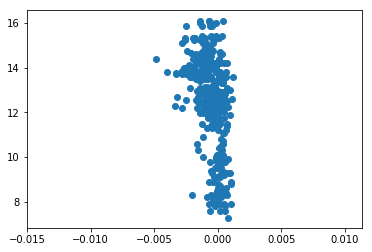

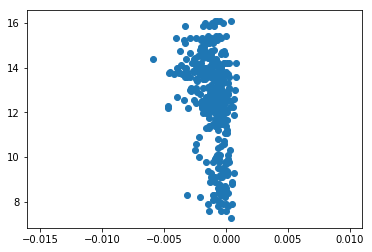

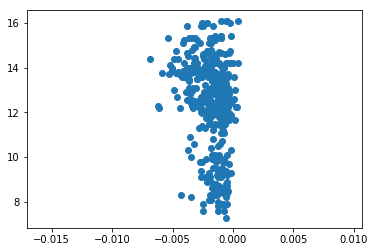

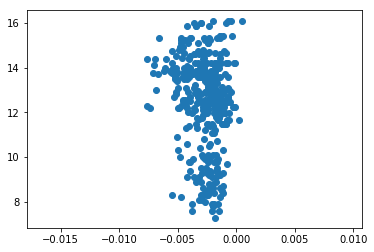

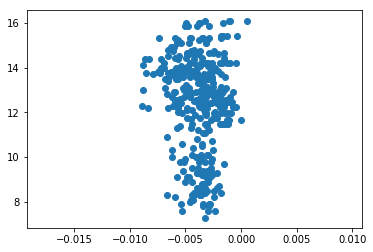

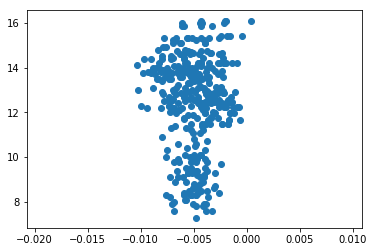

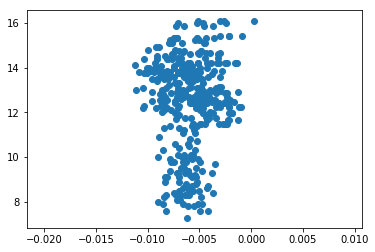

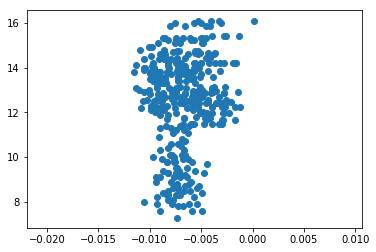

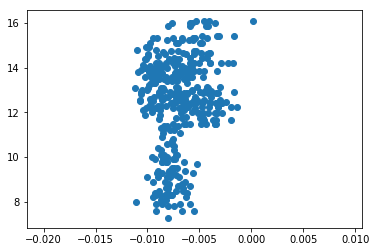

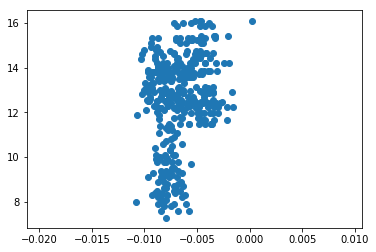

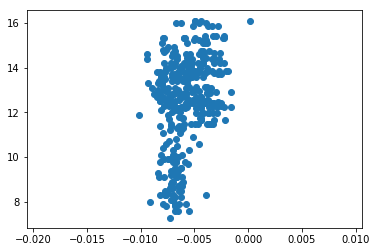

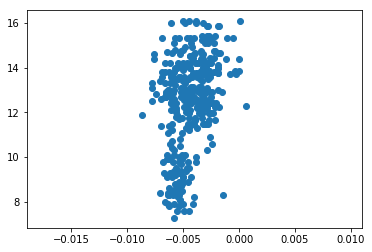

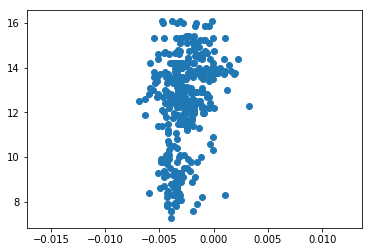

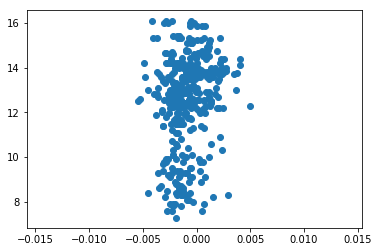

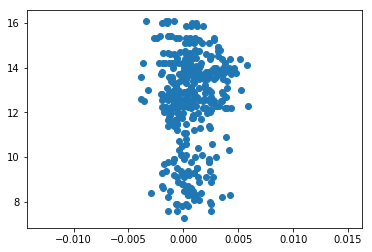

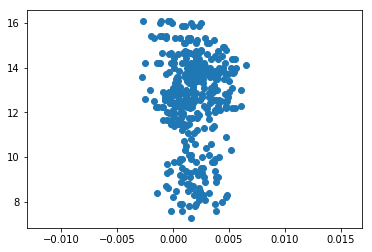

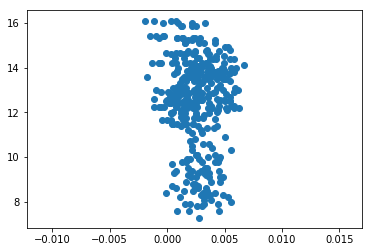

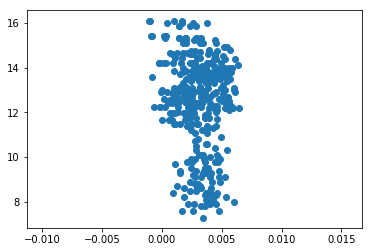

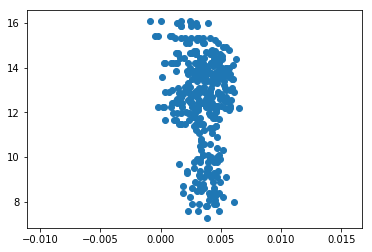

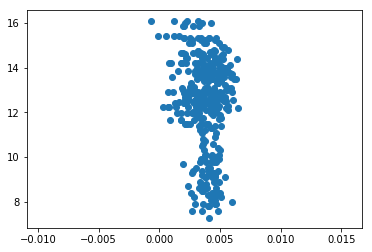

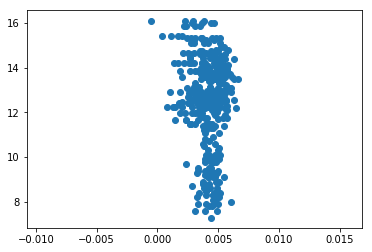

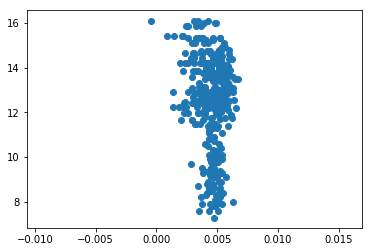

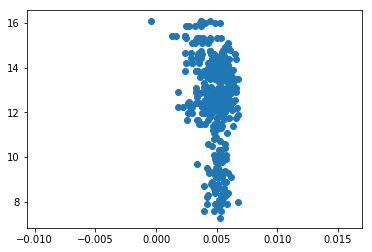

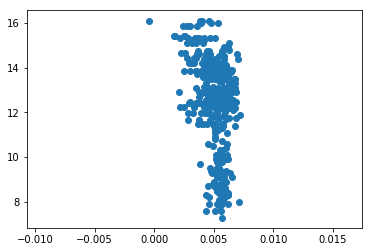

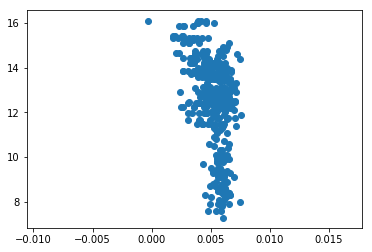

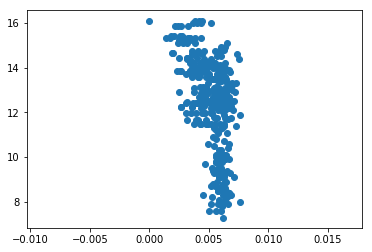

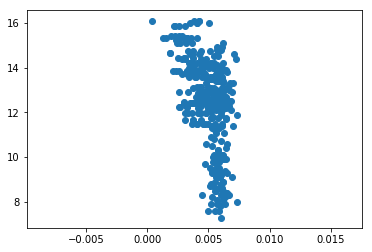

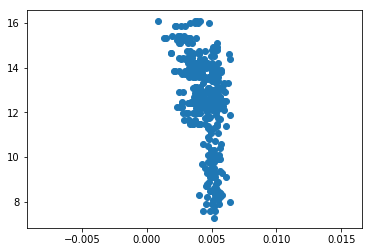

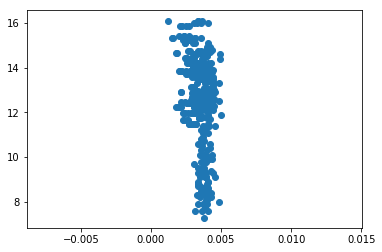

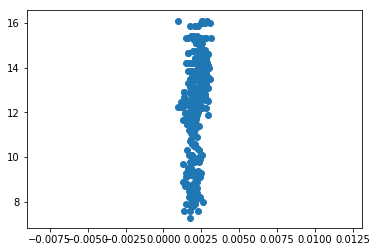

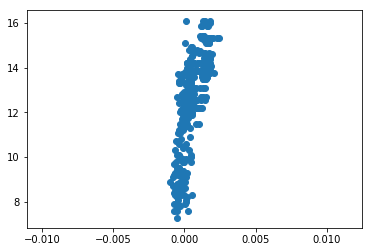

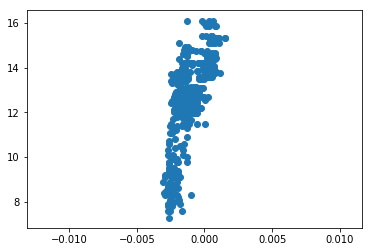

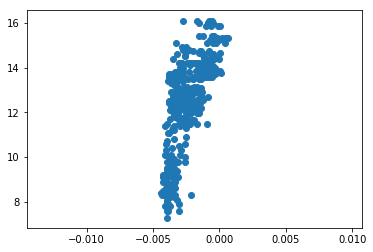

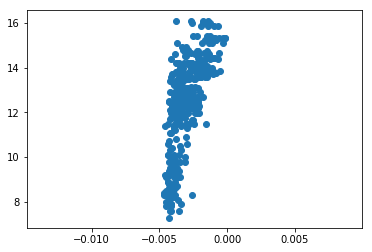

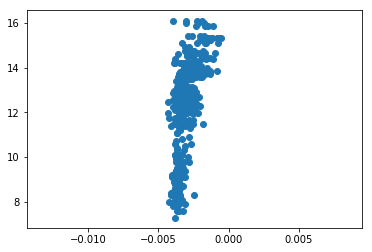

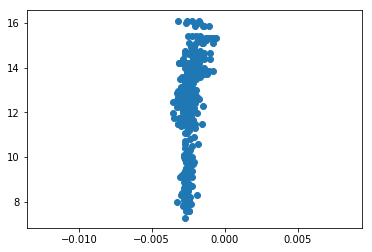

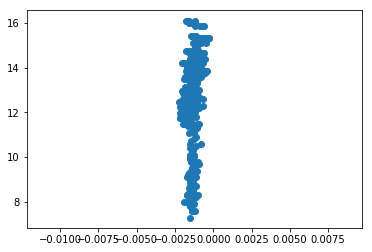

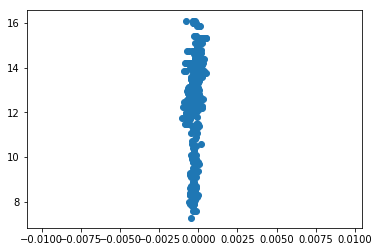

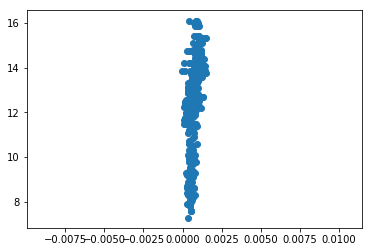

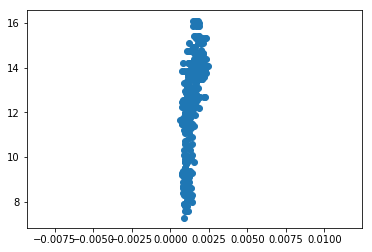

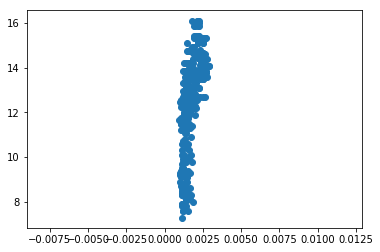

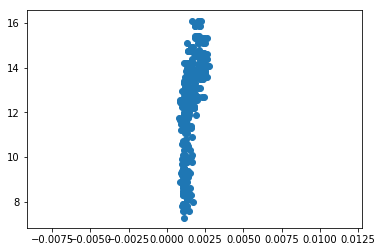

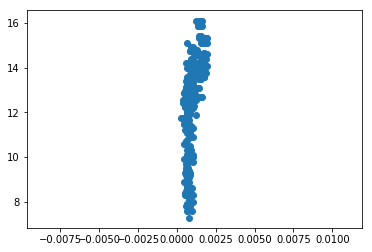

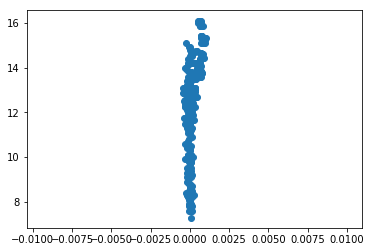

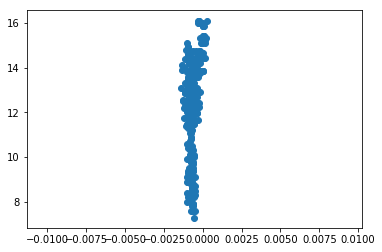

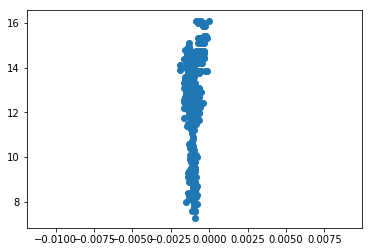

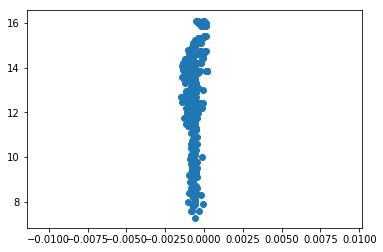

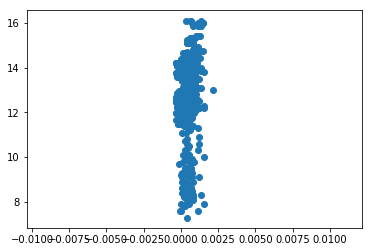

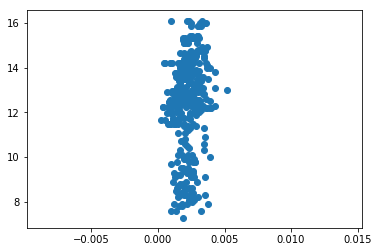

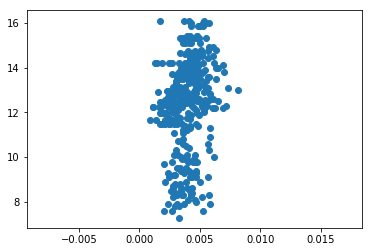

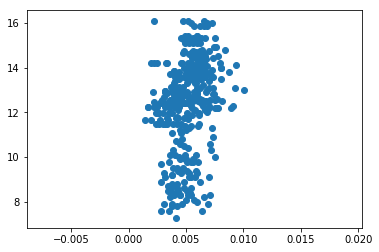

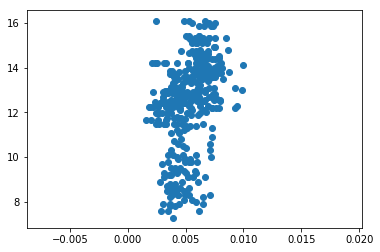

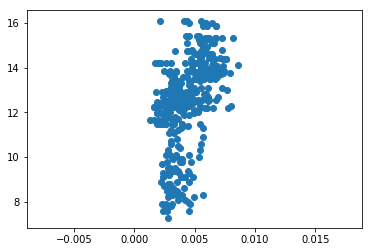

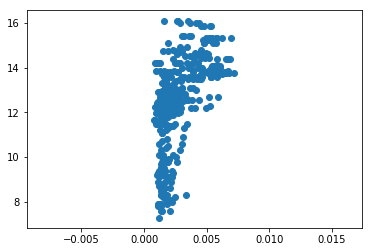

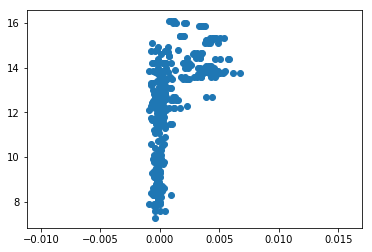

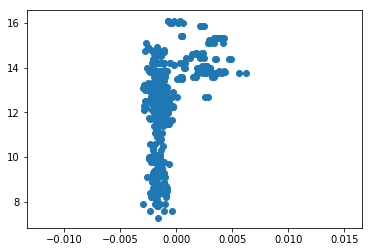

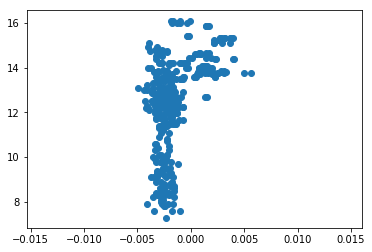

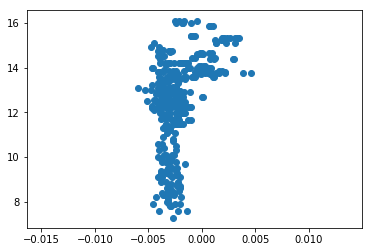

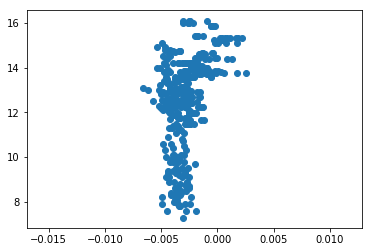

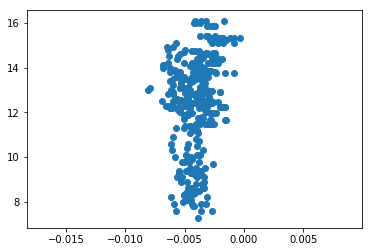

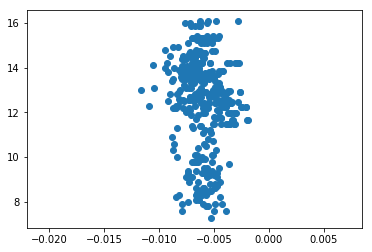

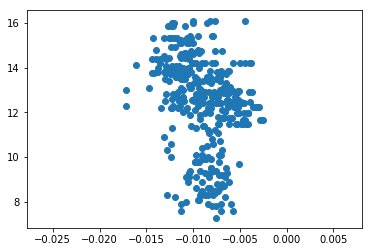

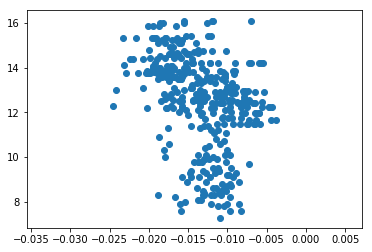

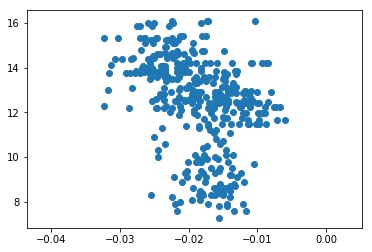

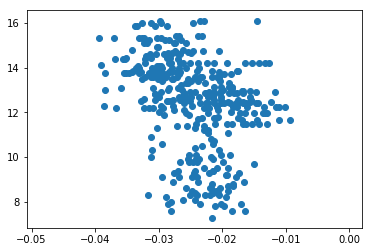

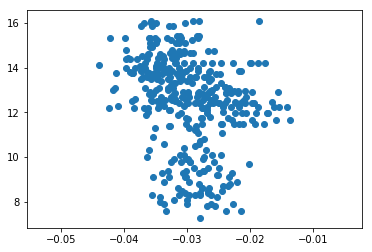

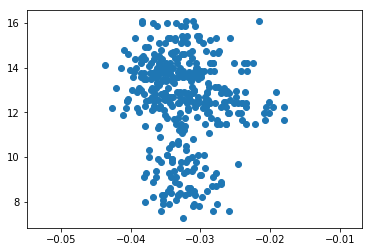

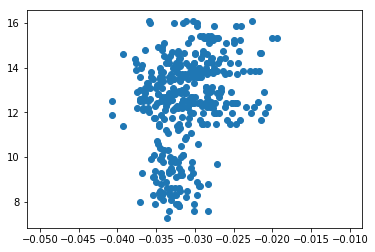

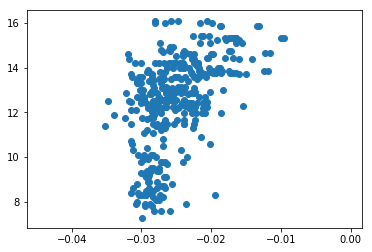

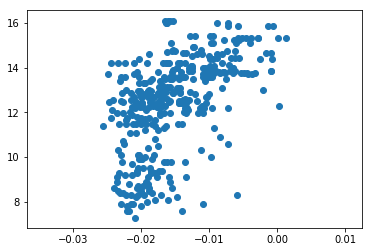

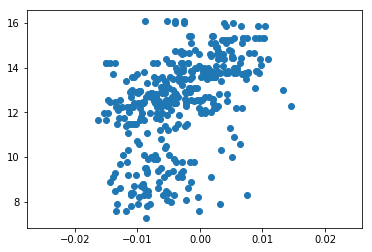

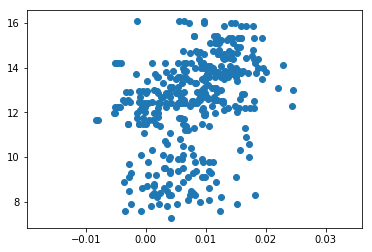

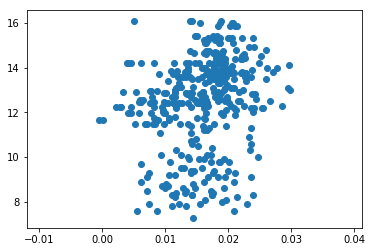

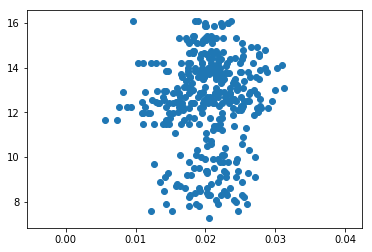

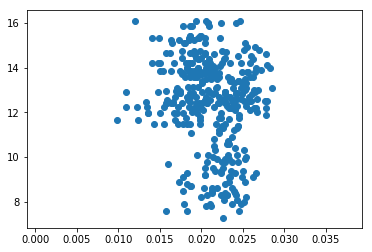

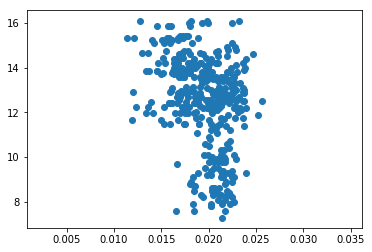

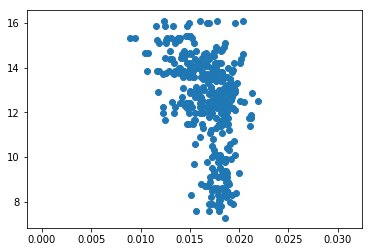

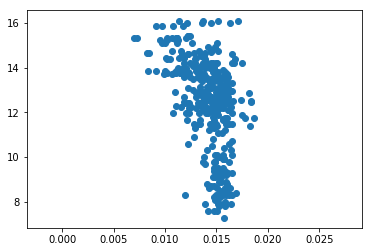

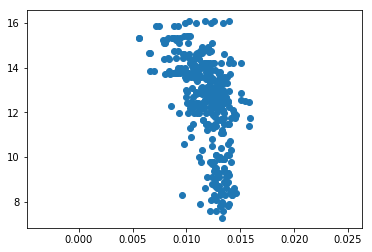

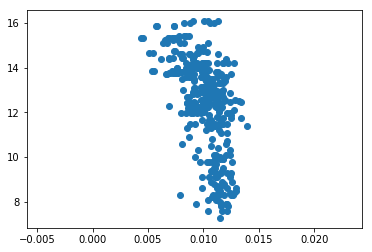

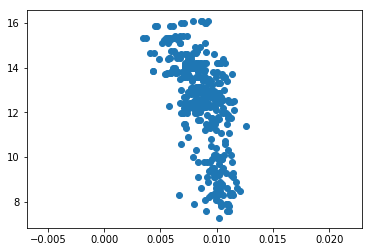

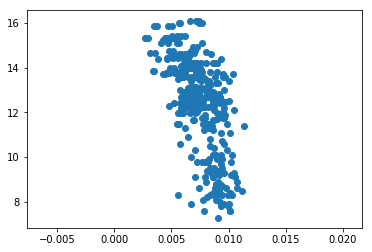

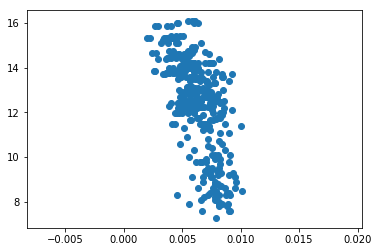

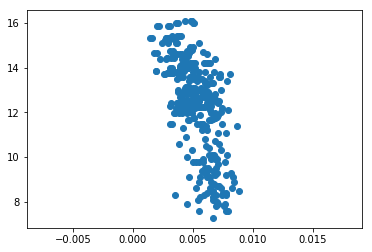

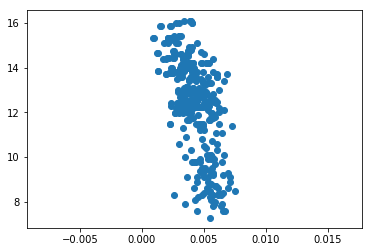

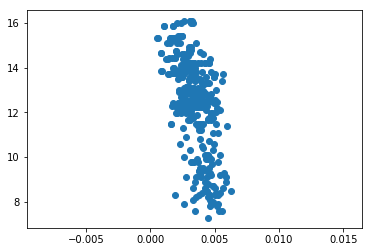

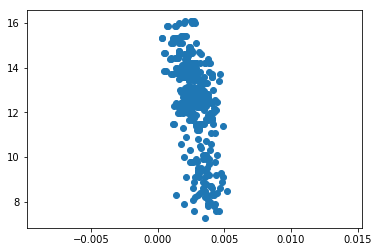

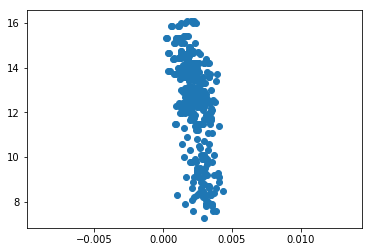

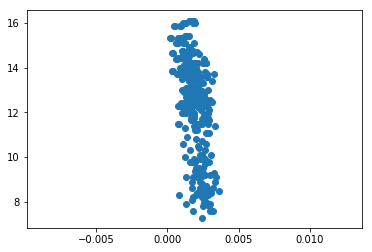

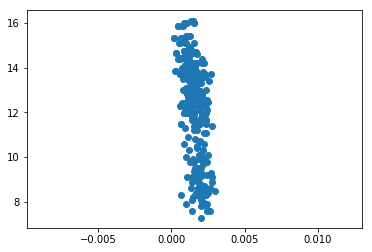

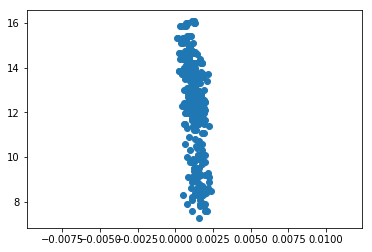

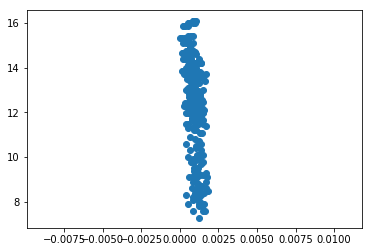

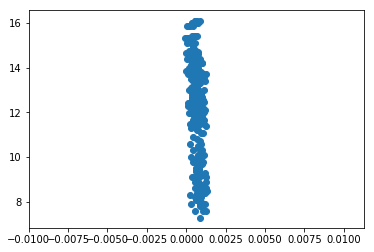

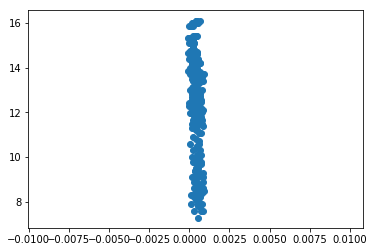

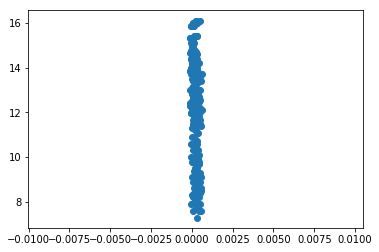

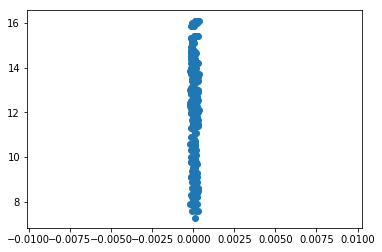

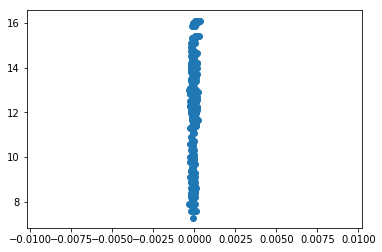

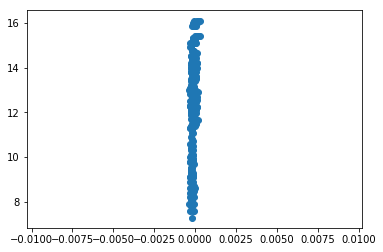

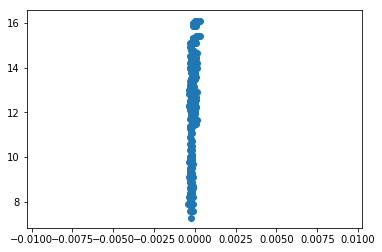

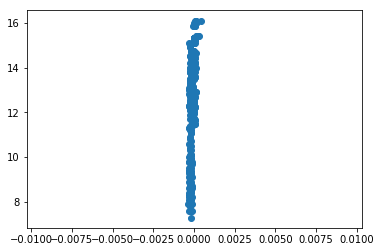

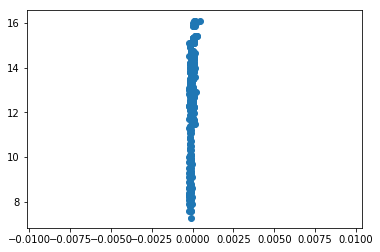

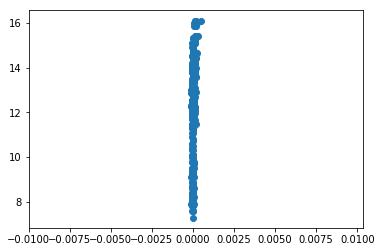

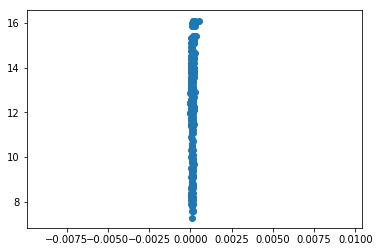

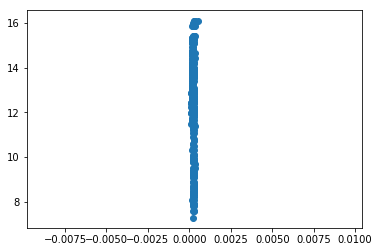

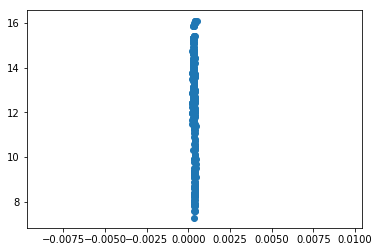

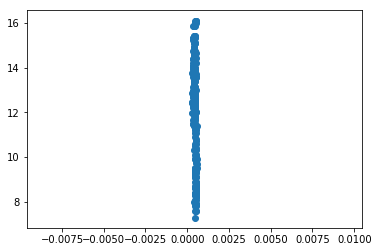

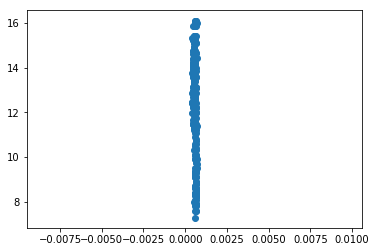

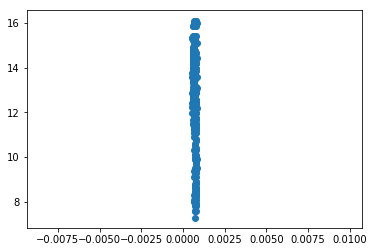

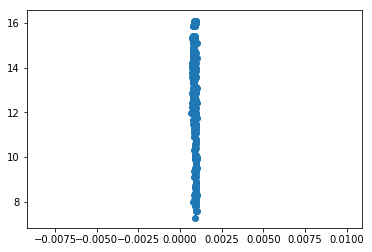

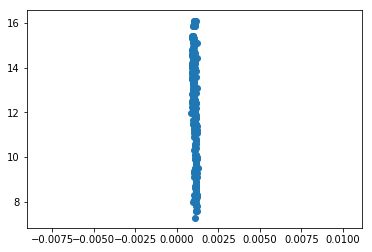

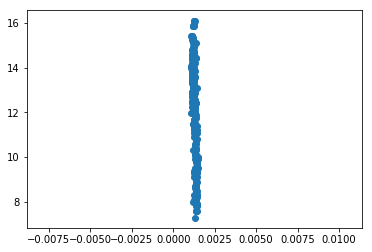

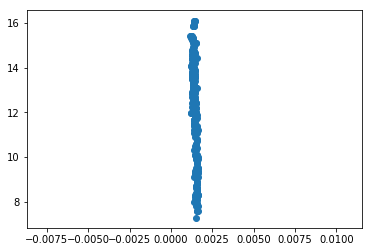

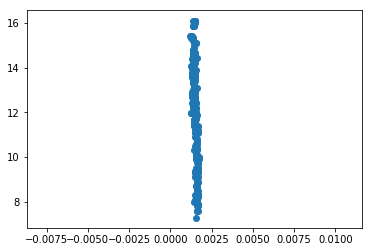

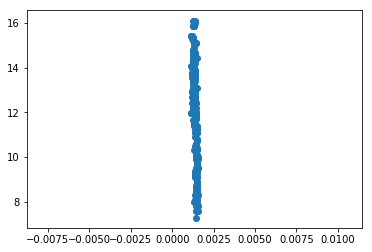

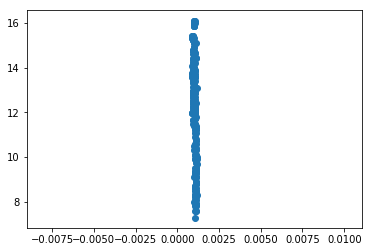

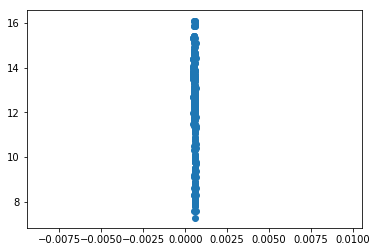

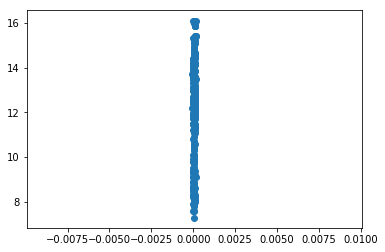

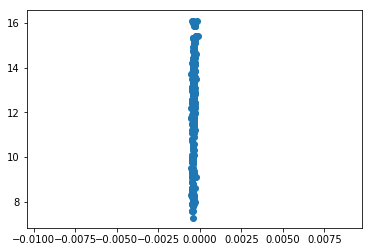

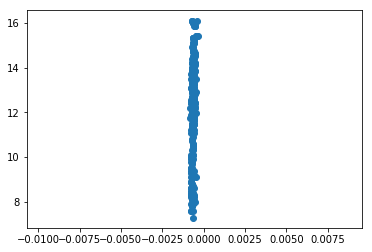

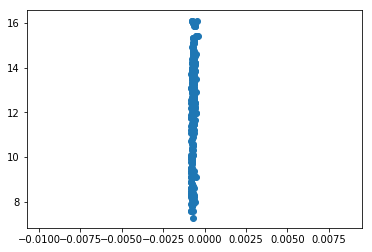

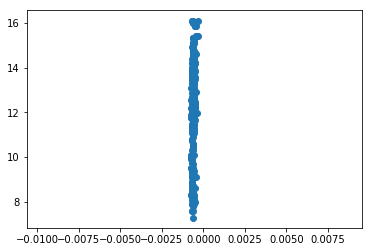

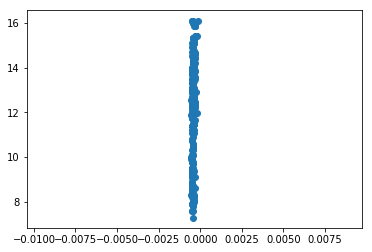

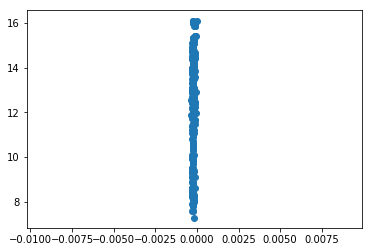

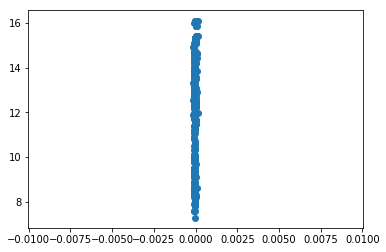

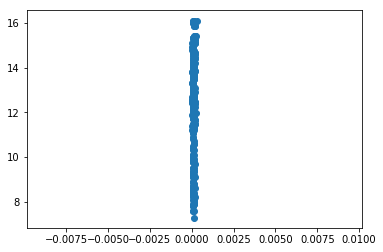

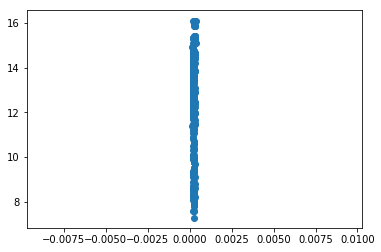

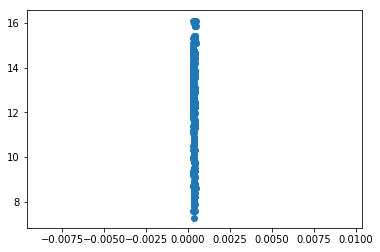

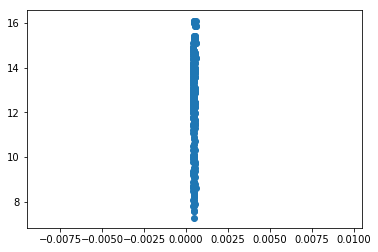

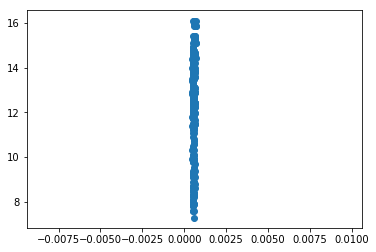

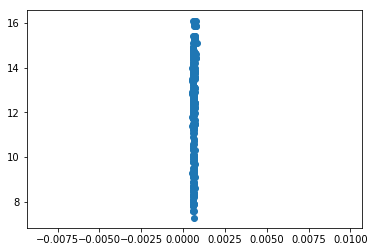

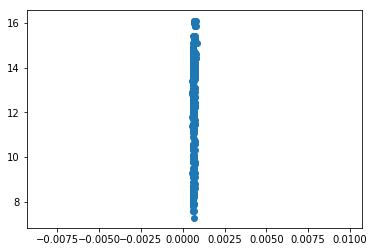

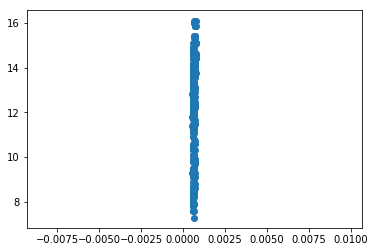

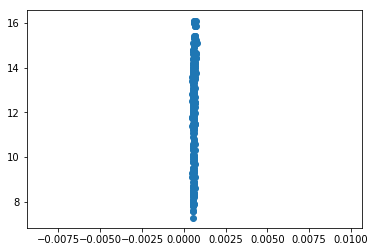

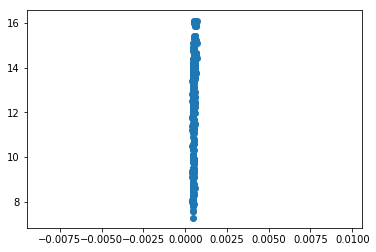

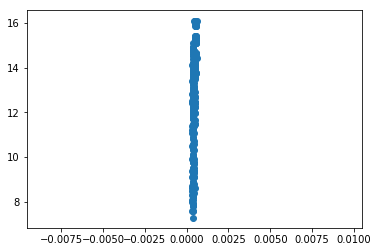

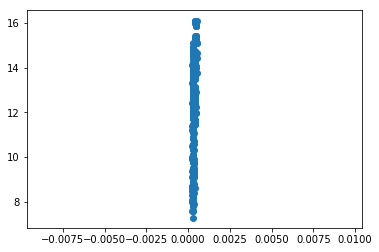

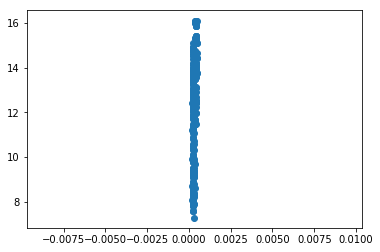

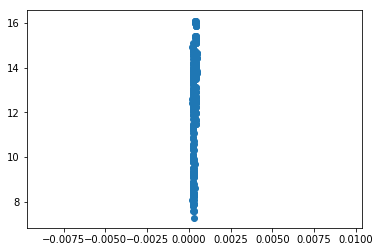

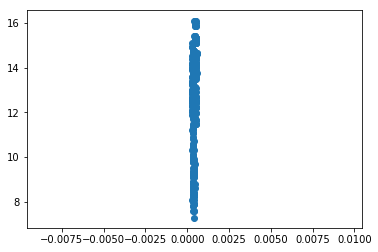

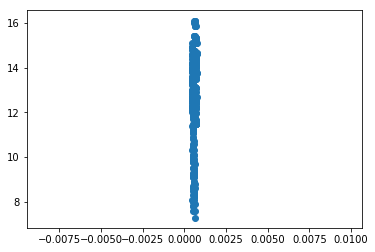

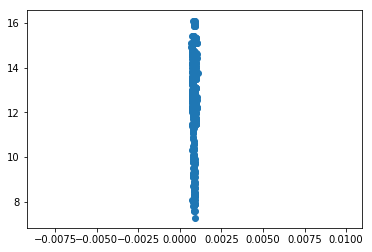

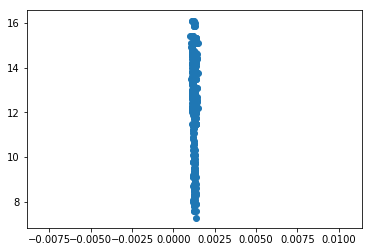

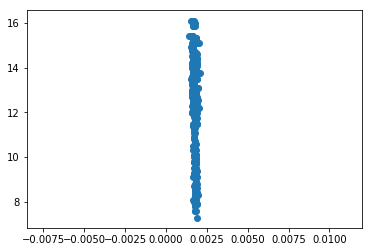

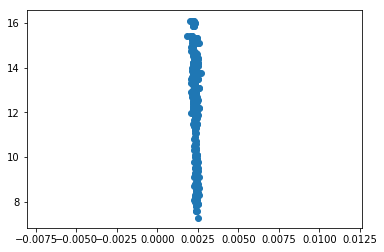

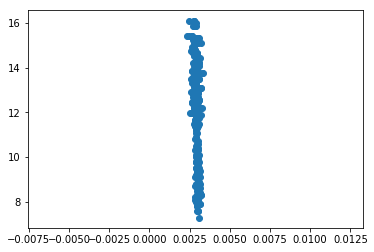

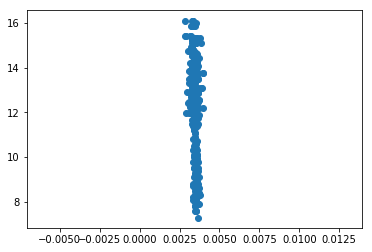

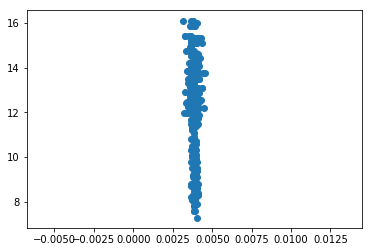

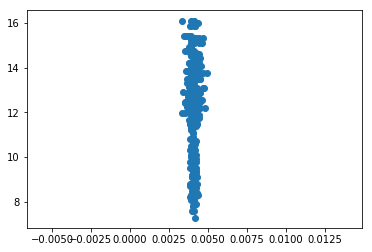

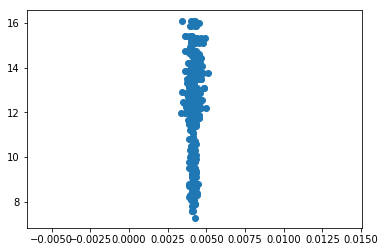

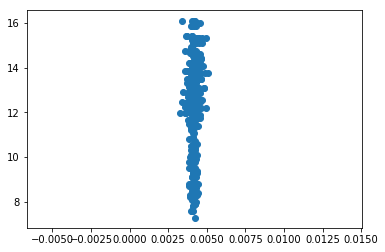

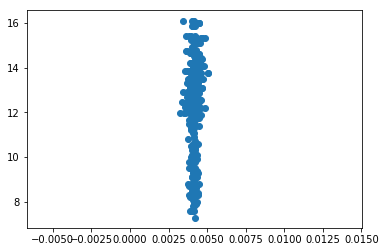

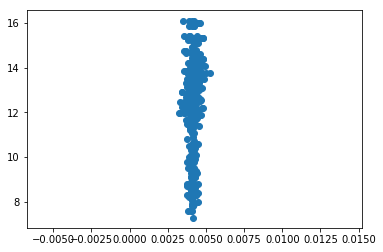

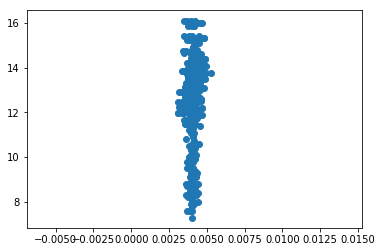

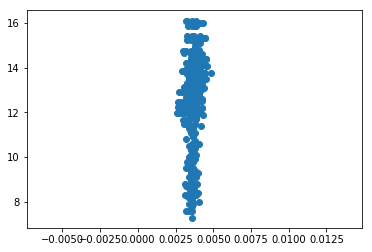

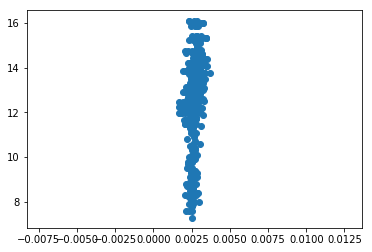

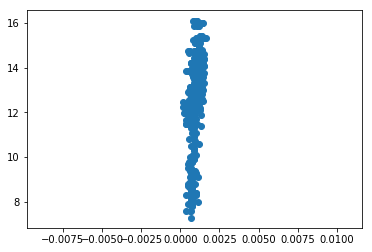

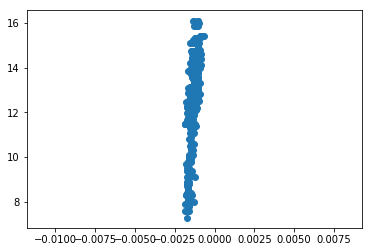

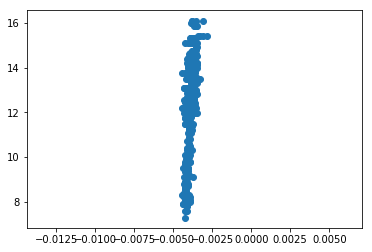

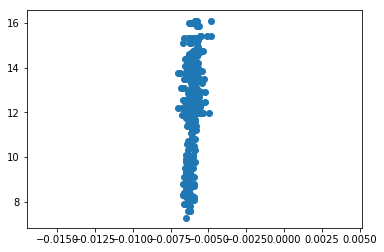

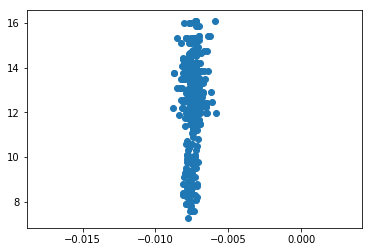

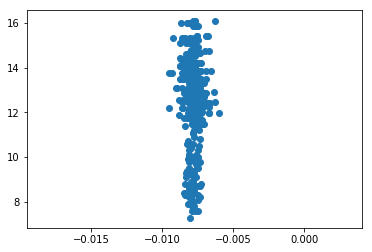

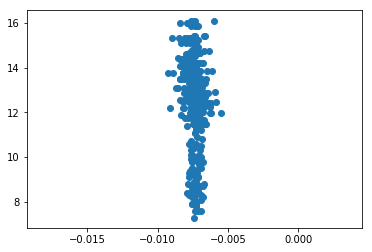

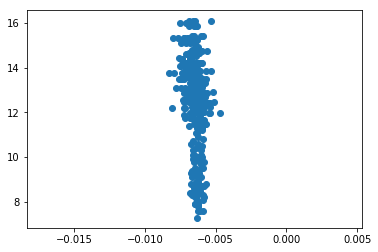

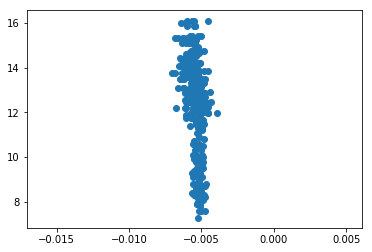

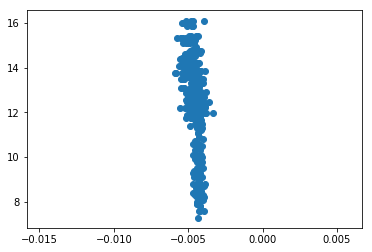

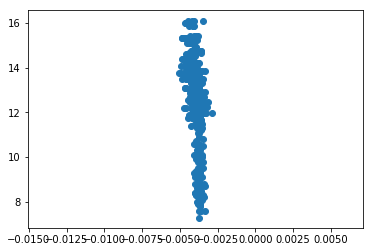

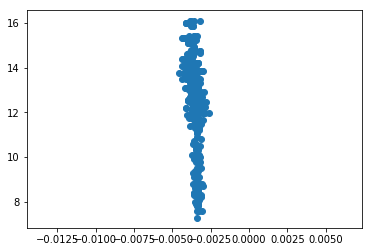

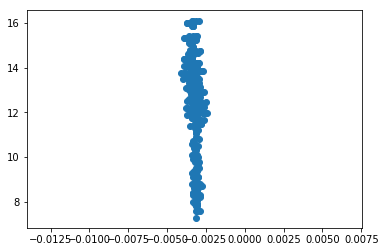

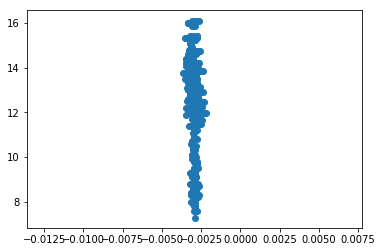

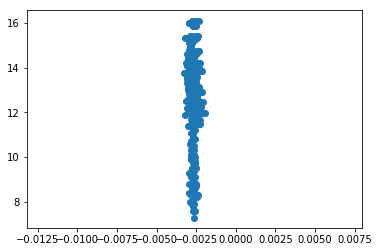

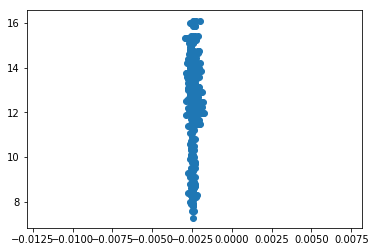

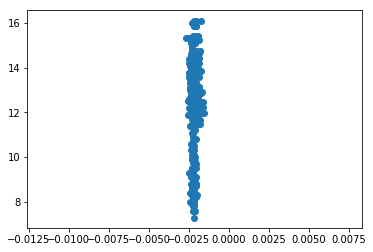

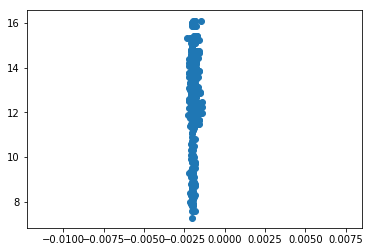

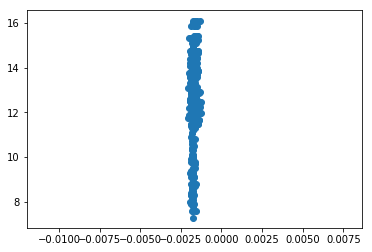

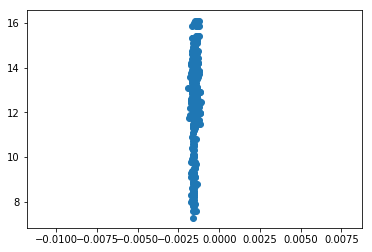

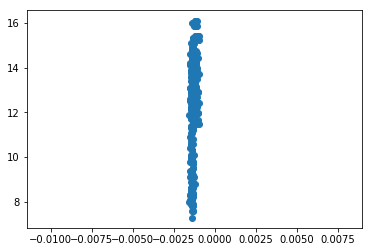

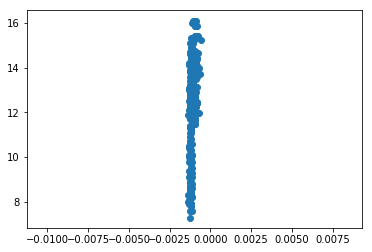

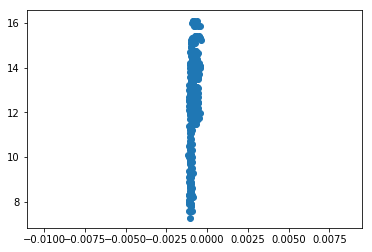

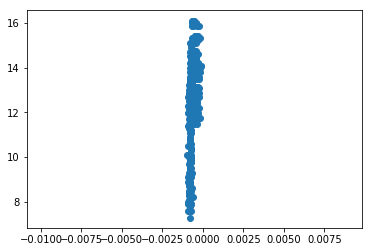

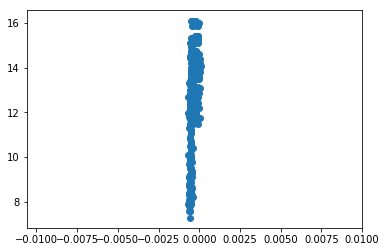

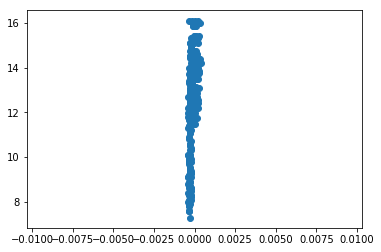

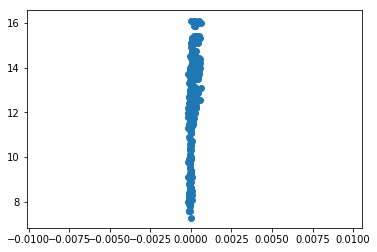

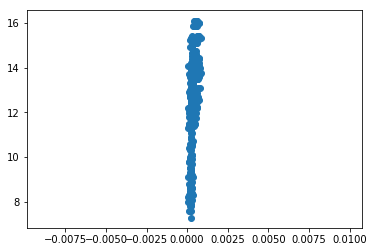

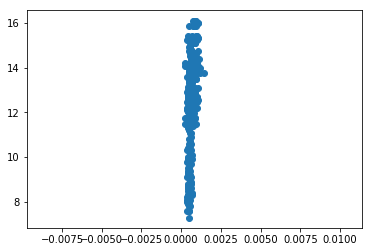

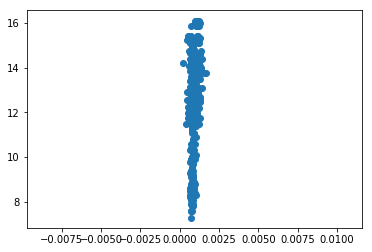

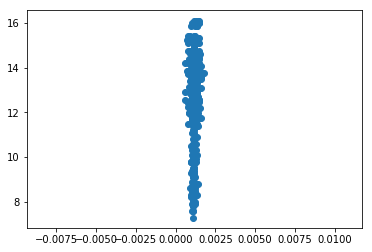

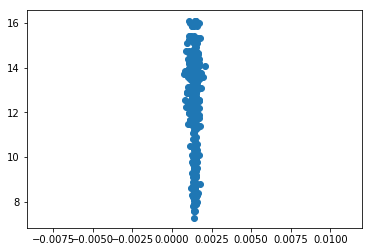

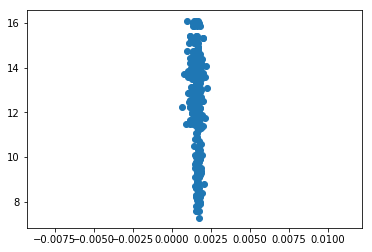

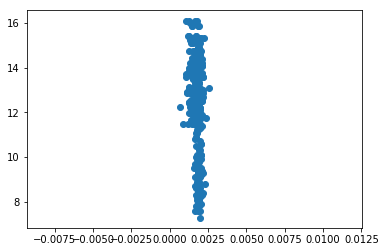

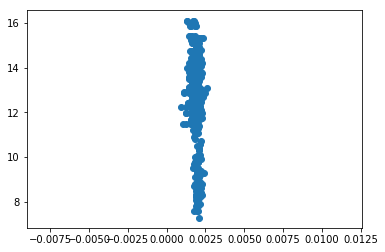

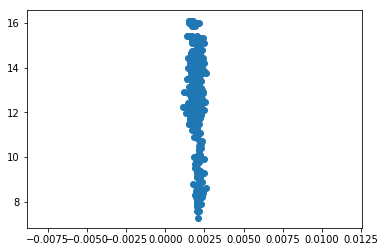

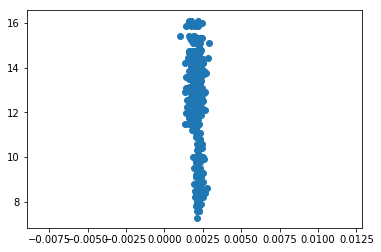

In [5]:
for i in range(208):
    plt.scatter(X_matrix_nonzero[:, i], Y)
    plt.show()

## Split Training and Testing Data

In [6]:
from sklearn.cross_decomposition import PLSRegression
X_train, X_test, Y_train, Y_test = train_test_split(X_matrix_nonzero, Y, test_size = 0.2)

## PCA + Linear Regression


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train, Y_train)

from sklearn.linear_model import LinearRegression
top_2_pca = np.argsort(pca.components_[0])[-2:]
LR = LinearRegression()
LR.fit(X_train[:, top_2_pca], Y_train)
Y_pred = LR.predict(X_test[:, top_2_pca])
score = r2_score(Y_pred, Y_test)
print(score)

-0.5815034734275202


## PLS


100%|██████████| 207/207 [00:05<00:00, 36.56it/s]

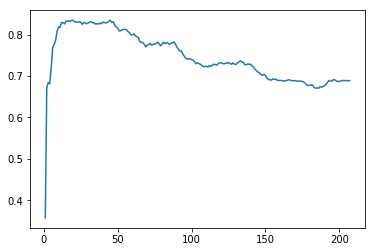

In [47]:
accuracy_list = []
for i in tqdm(range(1, X_train.shape[1])):
    pls2 = PLSRegression(n_components=i)
    pls2.fit(X_train, Y_train)
    Y_pred = pls2.predict(X_test)
    score = r2_score(Y_pred, Y_test)
    accuracy_list.append(score)
plt.plot(range(1, X_train.shape[1]), accuracy_list)

## Check PLS n_component trend

In [ ]:
import chart_studio.plotly as py
import plotly.figure_factory as FF
import plotly.graph_objs as go

import numpy as np
from scipy.spatial import Delaunay

x = np.linspace(0, 2*np.pi, 10)
y = np.linspace(0, 2*np.pi, 10)
z = np.random.random(10)

def Simple3dPlot(u, v, z):
    u,v = np.meshgrid(u,v)
    u = u.flatten()
    v = v.flatten()

    x = u
    y = v
    z = np.array(list(z)*len(z))

    points2D = np.vstack([u,v]).T
    tri = Delaunay(points2D)
    simplices = tri.simplices

    fig1 = FF.create_trisurf(x=x, y=y, z=z,
                             simplices=simplices)
    
    return fig1

Simple3dPlot(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1], pls2.y_scores_[:, 1])

In [ ]:
Simple3dPlot(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1], pls2.y_scores_[:, 0])

In [12]:
pls2 = PLSRegression(n_components=17)
pls2.fit(X_train, Y_train)
Y_pred = pls2.predict(X_test)
score = r2_score(Y_pred, Y_test)
print(score)

0.832132768160143


In [14]:
pca = PCA(n_components=100)
pca.fit(X_train, Y_train)
np.argsort(pca.components_[0])[-100:]

array([154, 131, 135, 192, 144, 134, 153, 132, 133, 145, 152, 159, 146,
       151, 147, 150, 148, 149, 193, 160, 194, 201, 161, 202,  62, 195,
       200,  42, 173, 199, 198, 196, 203, 197, 207, 162,  41, 206, 204,
       205, 163,  43, 164, 165,  59, 166, 172,  40, 167, 168, 171,  53,
       169,  44, 170,  54,  52,  58,  73,  55,  39,  27,  63,  56,  57,
        45,  51,  38,  50,  46,  72,  49,  47,  48,  37,  71,  64,  36,
        91,  35,  28,  70,  34,  33,  65,  29,  32,  69,  30,  31,  66,
        68,  67,  84,  90,  89,  85,  88,  86,  87])

## PCA + PLS

In [15]:
accuracy_list = []
np.seterr(divide='ignore', invalid='ignore')
pp_x=[]
pp_y=[]
for i in tqdm(range(2, 1000)):
    for j in range(1, i):
        pca = PCA(n_components=i)
        pca.fit(X_train, Y_train)

        from sklearn.metrics import r2_score

        pls2 = PLSRegression(n_components=j)
        pls2.fit(pca.transform(X_train), Y_train)
        Y_pred = pls2.predict(pca.transform(X_test))
        score = r2_score(Y_pred, Y_test)
        pp_x.append(i)
        pp_y.append(j)
        accuracy_list.append(score)

 17%|█▋        | 174/998 [05:12<1:09:29,  5.06s/it]

KeyboardInterrupt: 

In [ ]:
len(pp_x), len(pp_y), len(accuracy_list)

In [ ]:
def Simple3dPlot(u, v, z):
    u,v = np.meshgrid(u,v)
    u = u.flatten()
    v = v.flatten()

    x = u
    y = v
    z = np.array(list(z)*len(z))

    points2D = np.vstack([u,v]).T
    tri = Delaunay(points2D)
    simplices = tri.simplices

    fig1 = FF.create_trisurf(x=x, y=y, z=z,
                             simplices=simplices)
    
    return fig1

Simple3dPlot(pp_x[1:100], pp_y[1:100], accuracy_list[1:100])

In [ ]:
plt.scatter(Y_pred, Y_test)

In [43]:
pls2 = PLSRegression(n_components=17)
pls2.fit(X_train, Y_train)
Y_pred = pls2.predict(X_test)
score = r2_score(Y_pred, Y_test)
score

0.832132768160143

In [42]:

plsCano = PLSCanonical(n_components=2, algorithm="nipals")
plsCano.fit(X_train, Y_train)
# Y_pred = plsCano.predict(X_test)
# score = r2_score(Y_pred, Y_test)
# Y_pred

/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


PLSCanonical(algorithm='nipals', copy=True, max_iter=500, n_components=2,
       scale=True, tol=1e-06)

In [24]:
# for i in range(100)
pls2_nested = PLSRegression(n_components=2)
pls2_nested.fit(pls2.x_scores_, pls2.y_scores_)
pls2_nested.predict(pls2.transform(X_test))

array([[ -5.26406342,   4.52041629,  15.16196473, ...,   0.63961245,
          0.47426693,   0.23793908],
       [  4.26197937,  -3.59751604, -11.92272012, ...,  -0.48883846,
         -0.36238651,  -0.18178735],
       [ -4.08395512,  -1.44888478, -16.27936233, ...,  -1.80898471,
         -1.34792806,  -0.67795987],
       ...,
       [ -0.35833552,   2.56899889,  13.82726662, ...,   1.09536196,
          0.81520438,   0.40976544],
       [ -0.53076872,   2.70024723,  14.22871766, ...,   1.10848728,
          0.82491434,   0.41463112],
       [  1.55244559,  -1.58097373,  -5.87384222, ...,  -0.30391182,
         -0.22567707,  -0.11330721]])

## Tuning C in SVR

The difference of SVR to simple linear regression is that it only minimize the error in a certain range

In [ ]:
accuracy_list = []
for i in tqdm(np.arange(0.1, 10000000, 10000)):
    svr = SVR(gamma='auto', C=i, epsilon=0.2)
    svr.fit(X_train, Y_train)
    Y_pred = svr.predict(X_test)
    score = r2_score(Y_pred, Y_test)
    accuracy_list.append(score)

In [ ]:
np.arange(0.1, 10000000, 10000)[np.argmax(accuracy_list)]

In [ ]:
plt.plot([x for x in accuracy_list if abs(x)<1])

In [ ]:
accuracy_list = []
for i in tqdm(np.arange(5410000, 5430000, 10)):
    svr = SVR(gamma='auto', C=i, epsilon=0.2)
    svr.fit(X_train, Y_train)
    Y_pred = svr.predict(X_test)
    score = r2_score(Y_pred, Y_test)
    accuracy_list.append(score)

In [ ]:
plt.plot([x for x in accuracy_list if abs(x)<1])

In [ ]:
np.arange(5410000, 5430000, 10)[np.argmax(accuracy_list)]

In [ ]:
accuracy_list = []
for i in tqdm(np.arange(0, 10, 0.01)):
    svr = SVR(gamma='auto', C=5422560, epsilon=i)
    svr.fit(X_train, Y_train)
    Y_pred = svr.predict(X_test)
    score = r2_score(Y_pred, Y_test)
    accuracy_list.append(score)

In [ ]:
plt.plot([x for x in accuracy_list if abs(x)<1])

In [ ]:
len(np.arange(4222560, 6000000, 10000))

In [ ]:
Xs=[]
Ys=[]
Zs=[]
for ep in tqdm(np.arange(0, 10, 0.1)):
    for c in np.arange(4222560, 6000000, 20000):
        svr = SVR(gamma='auto', C=c, epsilon=ep)
        svr.fit(X_train, Y_train)
        Y_pred = svr.predict(X_test)
        score = r2_score(Y_pred, Y_test)
        Zs.append(score)
        Xs.append(ep)
        Ys.append(c)
        

In [ ]:
accept_index = [i for i, z in enumerate(Zs) if abs(z) <1]
Xs = np.array(Xs)[accept_index]
Ys = np.array(Ys)[accept_index]
Zs = np.array(Zs)[accept_index]

In [ ]:
import chart_studio.plotly as py
import plotly.figure_factory as FF
import plotly.graph_objs as go

import numpy as np
from scipy.spatial import Delaunay

tmp_limit = 1000


u = Xs[:tmp_limit]
v = Ys[:tmp_limit]
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = u
y = v
z = np.array(Zs)[:tmp_limit]
z = np.array(list(z)*len(z))

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

In [ ]:
fig1 = FF.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))

In [ ]:
fig1

State: hyper parameter values <br>
Transition: change of hyper parametter values <br>
Action: add or subtract action <br>
Reward: the r2 score
Y (discount): 0.8
Learning Rate: step